# Run Correlation-Based Analyses

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a correlation between a dependent variable and an independent variable is statistically significant using permutation analysis. 

Further, follow this up with a contrast analysis which sees which categorical variables have significantly different correlations from each other. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [1]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/master_list.csv'

In [2]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,subject,CerebellumCSF,CerebellumCSFCount,CerebellumGM,CerebellumGMCount,cerebellumVisualCH,CerebellumWM,CerebellumWMCount,FrontalCSF,FrontalCSFCount,...,temporalVisualCH,TemporalWM,TemporalWMCount,ventricleVisualCH,WholeBrainCSF,WholeBrainCSFCount,WholeBrainGM,WholeBrainGMCount,WholeBrainWM,WholeBrainWMCount
0,0001.nii,-4497.364934,16387,980.567621,24663,1,2977.241279,21397,-9854.189802,40522,...,0,1524.001040,22906,0,-43714.850900,132083,-15942.769580,193017,68946.408350,187216
1,0002.nii,-2201.458697,16404,-18138.572720,24663,1,-11183.039810,21396,-9149.893654,40512,...,1,-4416.457031,22909,1,-19536.494390,132115,-75878.032190,193026,-83971.989540,187201
2,0003.nii,5422.499148,16393,-5613.118199,24679,1,9831.510960,21446,13796.400820,40537,...,2,1796.426368,22981,2,45092.829410,132254,-48384.405840,193082,-6820.499247,187463
3,0004.nii,10039.542490,16404,4899.249983,24663,2,6559.417793,21409,10684.093530,40589,...,1,3307.858126,22916,2,64515.424300,132354,-26500.982150,193064,60019.640710,187341
4,0005.nii,-807.610765,16387,-10722.003290,24663,1,-7145.779641,21396,-5685.897742,40515,...,0,-4048.077266,22907,0,-15105.591270,132074,-49519.130740,193020,-39736.094230,187197
5,0006.nii,-2512.170377,16399,-1056.173682,24673,0,2425.407108,21402,-4723.426224,40534,...,0,4329.378159,22918,0,-12286.997250,132151,-13155.112780,193123,43535.000940,187271
6,0007.nii,-3810.571029,16402,2017.963719,24687,1,2364.859302,21413,-5452.430173,40528,...,1,940.808863,22915,2,-16570.910670,132119,17525.514590,193081,12159.174960,187250
7,0008.nii,-1377.764614,16388,-301.016853,24679,1,1047.897930,21408,4570.889094,40547,...,2,-2041.810147,22922,2,44137.916700,132506,-16775.888770,193118,34945.745630,187319
8,0009.nii,21528.922020,16460,10057.371230,24669,1,15527.412260,21417,24748.663740,40594,...,1,4258.323325,22924,2,96143.421810,132465,29120.807090,193049,98099.894660,187322
9,0010.nii,-331.479770,16387,-6104.352219,24663,1,580.351404,21397,-1913.363895,40523,...,1,2385.009517,22908,1,-13476.156710,132091,-1646.868010,193011,43476.379280,187206


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['subject', 'CerebellumCSF', 'CerebellumCSFCount', 'CerebellumGM',
       'CerebellumGMCount', 'cerebellumVisualCH', 'CerebellumWM',
       'CerebellumWMCount', 'FrontalCSF', 'FrontalCSFCount', 'FrontalGM',
       'FrontalGMCount', 'frontalVisualCH', 'FrontalWM', 'FrontalWMCount',
       'InsularCSF', 'InsularCSFCount', 'InsularGM', 'InsularGMCount',
       'InsularWM', 'InsularWMCount', 'mesial_temporalVisualCH',
       'OccipitalCSF', 'OccipitalCSFCount', 'OccipitalGM', 'OccipitalGMCount',
       'occipitalVisualCH', 'OccipitalWM', 'OccipitalWMCount', 'ParietalCSF',
       'ParietalCSFCount', 'ParietalGM', 'ParietalGMCount', 'parietalVisualCH',
       'ParietalWM', 'ParietalWMCount', 'TemporalCSF', 'TemporalCSFCount',
       'TemporalGM', 'TemporalGMCount', 'temporalVisualCH', 'TemporalWM',
       'TemporalWMCount', 'ventricleVisualCH', 'WholeBrainCSF',
       'WholeBrainCSFCount', 'WholeBrainGM', 'WholeBrainGMCount',
       'WholeBrainWM', 'WholeBrainWMCount'],
      dtype='ob

In [5]:
drop_list = ['Z_Scored_Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
0,101,62.0,-0.392857,0.314066,-21.428571,-1.282630,56.864683,0.447264,0.494596,-1.895022,...,Low,28.0,1.518764,-1.518764,0.72,0.28,12.222658,14.493929,-1.714513,-1.227368
1,102,77.0,-0.666667,0.013999,-36.363636,-1.760917,52.970984,0.436157,0.502192,-1.909919,...,Low,22.0,0.465551,-0.465551,0.48,0.52,14.020048,15.257338,-1.155843,-1.022243
2,103,76.0,-1.447368,-0.841572,-78.947368,-0.595369,62.459631,0.497749,0.581148,-0.803738,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.118727,17.376384,-0.814348,-0.452865
3,104,65.0,-2.372549,-1.855477,-129.411765,-0.945206,59.611631,0.432617,0.520518,-1.401520,...,Low,17.0,-0.412127,0.412127,0.28,0.72,13.112424,15.287916,-1.437954,-1.014027
4,105,50.0,-0.192982,0.533109,-10.526316,-1.151973,57.928350,0.193389,0.491742,-1.401705,...,Low,19.0,-0.061056,0.061056,0.36,0.64,15.086568,12.951426,-0.824344,-1.641831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,42,63.0,0.000000,0.000000,NaN,-0.574000,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,45,60.0,0.000000,0.000000,NaN,0.190000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.500000,0.500000,NaN,0.390000,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.000000,0.000000,NaN,-0.756000,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [12]:
column = 'Age'  # The column you'd like to evaluate
condition = 'below'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 65  # The value to compare against

In [13]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
80,11,65.0,-0.25,0.25,0.0,0.0987,13.2,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,15,69.0,0.00,0.00,0.0,0.1170,27.5,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,16,67.0,0.00,0.00,0.0,-0.1010,20.8,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,21,68.0,-0.25,0.25,0.0,-1.0600,24.2,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,40,77.0,0.00,0.00,NaN,1.1700,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.50,0.50,NaN,0.3900,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.00,0.00,NaN,-0.7560,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [14]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age', 'Z_Scored_Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity']

In [15]:
# data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
80,11,65.0,-0.25,0.25,0.0,0.0987,13.2,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,15,69.0,0.00,0.00,0.0,0.1170,27.5,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,16,67.0,0.00,0.00,0.0,-0.1010,20.8,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,21,68.0,-0.25,0.25,0.0,-1.0600,24.2,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,40,77.0,0.00,0.00,NaN,1.1700,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,48,73.0,-0.50,0.50,NaN,0.3900,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,49,68.0,0.00,0.00,NaN,-0.7560,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_df.describe()

,CerebellumCSF,CerebellumCSFCount,CerebellumGM,CerebellumGMCount,cerebellumVisualCH,CerebellumWM,CerebellumWMCount,FrontalCSF,FrontalCSFCount,FrontalGM,...,temporalVisualCH,TemporalWM,TemporalWMCount,ventricleVisualCH,WholeBrainCSF,WholeBrainCSFCount,WholeBrainGM,WholeBrainGMCount,WholeBrainWM,WholeBrainWMCount
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,1655.380325,16398.720000,107.655349,24672.840000,0.840000,1319.384195,21410.960000,4092.633869,40545.240000,204.160705,...,1.000000,1451.779048,22922.620000,1.020000,17397.190874,132226.7800,-1493.252885,193082.300000,23383.426351,187291.300000
std,5450.653538,13.986933,10766.002755,21.806533,0.650275,7286.948773,17.174922,11012.419753,28.206643,16114.802722,...,0.755929,6349.426744,18.943407,0.868731,39388.865098,186.3277,55196.413423,98.277045,66633.241191,85.281586
min,-8765.419115,16387.000000,-26412.015930,24663.000000,0.000000,-14307.885460,21396.000000,-16935.218110,40512.000000,-40740.635520,...,0.000000,-9825.348842,22906.000000,0.000000,-50519.732690,132074.0000,-143202.894800,193011.000000,-109992.038300,187197.000000
25%,-2311.770645,16388.000000,-4505.828557,24664.000000,0.000000,-3224.098053,21398.000000,-4607.428430,40522.250000,-10001.926703,...,0.000000,-3386.465341,22909.000000,0.000000,-11205.534057,132117.5000,-32150.369580,193032.750000,-23858.689988,187226.000000
50%,881.012102,16395.000000,-1286.185966,24668.000000,1.000000,1049.373776,21407.500000,3737.062386,40535.000000,1246.144081,...,1.000000,1232.404952,22915.500000,1.000000,12361.866855,132171.0000,848.580664,193057.500000,29370.577105,187273.000000
75%,5010.196432,16404.000000,5020.997462,24675.000000,1.000000,4792.182967,21416.500000,11682.016182,40565.000000,8393.297360,...,2.000000,4788.469754,22932.250000,2.000000,46595.119550,132290.0000,29087.186380,193094.000000,66299.998122,187324.250000
max,21528.922020,16460.000000,25114.113290,24816.000000,2.000000,21345.037160,21485.000000,32409.225480,40623.000000,36997.985770,...,2.000000,17212.533800,22981.000000,3.000000,121852.711500,133227.0000,112180.981200,193554.000000,155590.197100,187581.000000


# 02 - Perform Basic Correlation

In [6]:
import pandas as pd
import os 
import seaborn as sns
from scipy.stats import spearmanr, pearsonr, kendalltau
from natsort import index_natsorted

# Correcting the function to remove natural sorting and ensure DataFrame is passed
# DEPRECATED
def generate_scatterplot(dataframe, data_dict, columns_per_row=4, x_label='xlabel', y_label='ylabel', correlation='pearson', palette='tab10', out_dir=None, kde=True):
    '''
    Generate scatterplots with specified correlation coefficient annotated.

    :param dataframe: DataFrame containing the data
    :param data_dict: Dictionary where key is the dependent variable name, and value is a list of independent variable names
    :param columns_per_row: Number of columns per row in the facet plot
    :param x_label: Label for the x-axis
    :param y_label: Label for the y-axis
    :param correlation: method of correlation ('pearson', 'spearman', 'kendall')
    :return: Facet plot
    
    Example:
    plot = generate_scatterplot(dataframe=data_df, 
                     data_dict={dependent_variable:independent_variable_list}, 
                     x_label=x_label, 
                     y_label=y_label,
                     correlation=correlation,
                     palette='#E57373',
                     out_dir=out_dir)
    '''
    sns.set_style('white')
    # Check if palette is a hex code
    if isinstance(palette, str) and palette.startswith('#'):
        sns.set_palette(sns.color_palette([palette]))
    else:
        sns.set_palette(palette, 1, desat=1)
            
    for dependent_var, independent_vars in data_dict.items():
        # Melt the DataFrame for each dependent variable
        melted_df = pd.melt(dataframe, id_vars=[dependent_var], value_vars=independent_vars,
                            var_name='independent_variable_name', value_name='independent_variable_units')

        # Sort the DataFrame
        melted_df = melted_df.sort_values(by='independent_variable_name')

        # Begin plotting
        facet_plot = sns.lmplot(y=dependent_var, x='independent_variable_units', data=melted_df,
                                col='independent_variable_name', truncate=False, col_wrap=columns_per_row,
                                facet_kws=dict(sharex=False, sharey=True))

        # Calculate correlation for each cluster
        grouped_df = melted_df.groupby('independent_variable_name')
        
        if correlation == 'pearson':
            result = grouped_df.apply(lambda x: pearsonr(x['independent_variable_units'], x[dependent_var]))
        elif correlation == 'spearman':
            result = grouped_df.apply(lambda x: spearmanr(x['independent_variable_units'], x[dependent_var]))
        elif correlation == 'kendall':
            result = grouped_df.apply(lambda x: kendalltau(x['independent_variable_units'], x[dependent_var]))
        else:
            raise ValueError(f'Correlation {correlation} not specified, please select "pearson", "kendall" or "spearman"')

        # Annotate with correlation
        for ax in facet_plot.axes:
            # Get the title of the current subplot
            region = ax.get_title().split("=")[-1].strip()
            # Get the corresponding r, p values from the result
            r, p = result[region]
            ax.set_title(region)
            ax.annotate(f"r = {r:.2f}, p = {p:.5f}", xy=(.5, 1.0), xycoords='axes fraction',
                        xytext=(0, 0), textcoords='offset points', ha='center', va='top',
                        bbox=dict(boxstyle='round,pad=0.0', alpha=0.0),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
            
        facet_plot.set_xlabels(x_label)
        facet_plot.set_ylabels(y_label)
        
        
        os.makedirs(os.path.join(out_dir, 'scatterplot_figures'), exist_ok=True)
        facet_plot.savefig(os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}.png'))
        facet_plot.savefig(os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}.svg'))
        print('Figure saved to: ', (os.path.join(out_dir, f'scatterplot_figures/{x_label}_to_{y_label}')))
        return facet_plot
    
# Attempted Updated

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr, kendalltau

class ScatterplotGenerator:
    def __init__(self, dataframe, data_dict, x_label='xlabel', y_label='ylabel', correlation='pearson', palette='tab10', out_dir=None):
        self.dataframe = dataframe
        self.data_dict = data_dict
        self.x_label = x_label
        self.y_label = y_label
        self.correlation = correlation
        self.out_dir = os.path.join(out_dir, f'scatterplot_figures')
        self.palette = palette
        self.plots = []

    def set_palette(self):
        sns.set_style('white')
        if isinstance(self.palette, str) and self.palette.startswith('#'):
            sns.set_palette(sns.color_palette([self.palette]))
        else:
            sns.set_palette(self.palette, 1, desat=1)

    def plot_scatter_with_kde(self):
        for dependent_var, independent_vars in self.data_dict.items():
            for independent_var in independent_vars:
                plot = sns.jointplot(x=independent_var, y=dependent_var, data=self.dataframe, kind='reg', marginal_kws={'kde': True})
                
                # Calculate and annotate correlation
                if self.correlation == 'pearson':
                    r, p = pearsonr(self.dataframe[independent_var], self.dataframe[dependent_var])
                elif self.correlation == 'spearman':
                    r, p = spearmanr(self.dataframe[independent_var], self.dataframe[dependent_var])
                elif self.correlation == 'kendall':
                    r, p = kendalltau(self.dataframe[independent_var], self.dataframe[dependent_var])
                else:
                    raise ValueError(f'Correlation {self.correlation} not specified, please select "pearson", "kendall" or "spearman"')

                plot.ax_joint.annotate(f"{self.correlation.capitalize()} r = {r:.2f}, p = {p:.3f}", xy=(.05, .95), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top')
                plot.set_axis_labels(self.x_label, self.y_label)

                self.plots.append(plot)

    def save_plots(self):
        if self.out_dir:
            os.makedirs(self.out_dir, exist_ok=True)
            for i, plot in enumerate(self.plots):
                plot.savefig(os.path.join(self.out_dir, f'{self.x_label}_to_{self.y_label}.png'))
                plot.savefig(os.path.join(self.out_dir, f'{self.x_label}_to_{self.y_label}.svg'))
                print('Figure saved to: ', (os.path.join(out_dir, f'{self.x_label}_to_{self.y_label}')))
                plt.show()
                
    def run(self):
        self.set_palette()
        self.plot_scatter_with_kde()
        self.save_plots()


Define Variables to Correlate
- 

In [7]:
data_df.columns

Index(['subject', 'CerebellumCSF', 'CerebellumCSFCount', 'CerebellumGM',
       'CerebellumGMCount', 'cerebellumVisualCH', 'CerebellumWM',
       'CerebellumWMCount', 'FrontalCSF', 'FrontalCSFCount', 'FrontalGM',
       'FrontalGMCount', 'frontalVisualCH', 'FrontalWM', 'FrontalWMCount',
       'InsularCSF', 'InsularCSFCount', 'InsularGM', 'InsularGMCount',
       'InsularWM', 'InsularWMCount', 'mesial_temporalVisualCH',
       'OccipitalCSF', 'OccipitalCSFCount', 'OccipitalGM', 'OccipitalGMCount',
       'occipitalVisualCH', 'OccipitalWM', 'OccipitalWMCount', 'ParietalCSF',
       'ParietalCSFCount', 'ParietalGM', 'ParietalGMCount', 'parietalVisualCH',
       'ParietalWM', 'ParietalWMCount', 'TemporalCSF', 'TemporalCSFCount',
       'TemporalGM', 'TemporalGMCount', 'temporalVisualCH', 'TemporalWM',
       'TemporalWMCount', 'ventricleVisualCH', 'WholeBrainCSF',
       'WholeBrainCSFCount', 'WholeBrainGM', 'WholeBrainGMCount',
       'WholeBrainWM', 'WholeBrainWMCount'],
      dtype='ob

Variables to Correlate
- dependent_variable = 'Z_Scored_Percent_Cognitive_Improvement'
- independent_variable_list = ['Z_Scored_Cognitive_Baseline']


In [8]:
dependent_variable = 'cerebellumVisualCH'
independent_variable_list = ['CerebellumCSF', 'CerebellumCSFCount', 'CerebellumGM',
       'CerebellumGMCount', 'cerebellumVisualCH', 'CerebellumWM',
       'CerebellumWMCount']

Choose Correlation Method
- Options: 'spearman', 'pearson', 'kendall'

In [13]:
# Correlation Method
correlation = 'spearman'

Define plot Labels
- These are the axes

In [14]:
# Axis Labels
x_label = 'Neuroimaging Atrophy'
y_label = 'Visual Atrophy (GSA)'

Run the Correlation

Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)


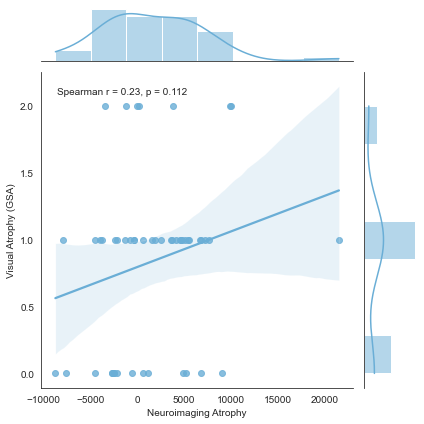

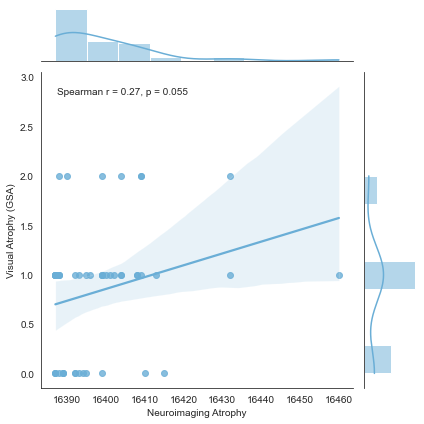

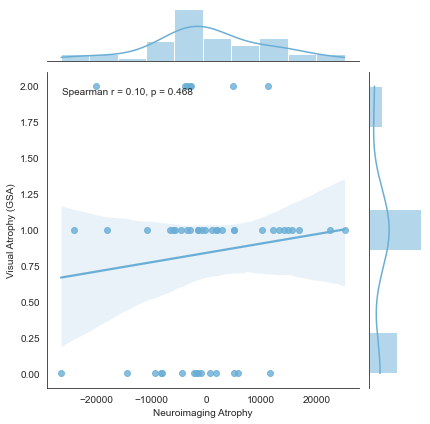

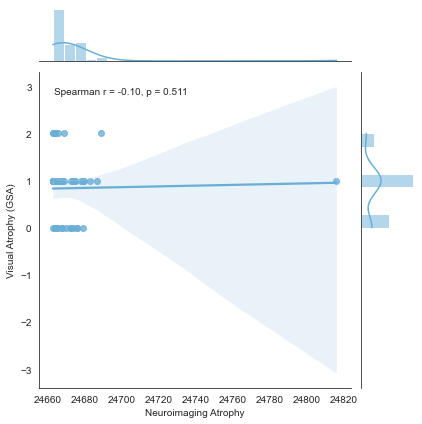

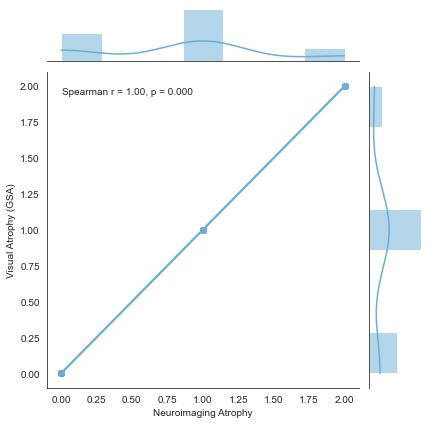

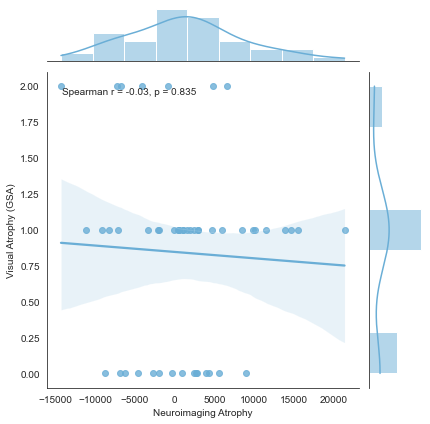

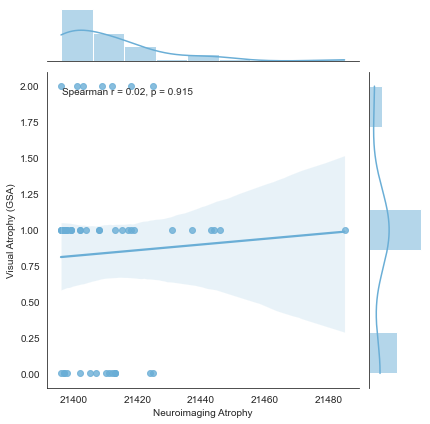

Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)
Figure saved to:  /Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/analyses/Neuroimaging Atrophy_to_Visual Atrophy (GSA)


In [15]:
# Usage Example
generator = ScatterplotGenerator(dataframe=data_df, data_dict={dependent_variable: independent_variable_list}, 
                                 x_label=x_label, y_label=y_label, correlation=correlation, 
                                 out_dir=out_dir, palette='Blues')
generator.run()

# 03 - Run ANCOVA-Style Analysis Using Correlation
- AKA a 'Delta-R Analysis'

In [9]:
from statannotations.Annotator import Annotator
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools
import random
import matplotlib.pyplot as plt
import seaborn as sns

class ANCOVACorrelation:
    def __init__(self, df, dependent_variable, independent_variable, categorical_variable, spearman=False, out_dir=None):
        self.df = df
        self.dependent_variable = dependent_variable
        self.independent_variable = independent_variable
        self.categorical_variable = categorical_variable
        self.out_dir = out_dir
        # Initialize a dictionary to store dataframes for each category
        self.category_dataframes = {}
        
        # Initialize a dictionary to store observed correlations
        self.observed_correlations = {}
        
        # Call the segregator function to split the data
        self.segregate_data()
        self.spearman=spearman
    
    def segregate_data(self):
        # Group the data by unique values of the categorical variable
        unique_categories = self.df[self.categorical_variable].unique()
        
        # Create separate dataframes for each category
        for category in unique_categories:
            self.category_dataframes[category] = self.df[self.df[self.categorical_variable] == category]
    
    def calculate_correlation(self, category):
        # Calculate the correlation between independent and dependent variables for a given category
        category_df = self.category_dataframes.get(category)
        if category_df is not None:
            if self.spearman:
                correlation = category_df[self.independent_variable].corr(category_df[self.dependent_variable], method='spearman')
            else:
                correlation = category_df[self.independent_variable].corr(category_df[self.dependent_variable])
            self.observed_correlations[category] = correlation
        else:
            print(f"Category '{category}' not found in the data.")

            
    def calculate_observed_r_values(self):
        # Calculate observed r values for each category and store them
        self.observed_correlations = {}
        for category in self.category_dataframes.keys():
            correlation = self.calculate_correlation(category)
            if correlation is not None:
                self.observed_correlations[category] = correlation

    def permute_and_calculate_correlations(self, n_permutations=10000):
        # Initialize a dictionary to store permuted correlations for each category
        self.permuted_correlations = {category: [] for category in self.category_dataframes.keys()}

        for _ in tqdm(range(n_permutations), desc="Permutations"):
            # Create a copy of the original data to permute
            permuted_data = self.df.copy()

            # Loop through each category's dataframe
            for category, category_df in self.category_dataframes.items():
                # Permute the outcomes (dependent variable) within the category's dataframe
                category_outcomes = category_df[self.dependent_variable].values
                random.shuffle(category_outcomes)
                permuted_data.loc[category_df.index, self.dependent_variable] = category_outcomes

                # Calculate and store the correlation with the independent variable
                correlation = category_df[self.independent_variable].corr(permuted_data.loc[category_df.index, self.dependent_variable])
                self.permuted_correlations[category].append(correlation)
                
    def calculate_p_values(self):
        '''
        This calculate a two-tailed p-value.
        '''
        # Initialize a dictionary to store p-values for each category
        self.p_values = {category: None for category in self.category_dataframes.keys()}

        for category in self.category_dataframes.keys():
            observed_val = self.observed_correlations[category]
            permuted_dist = self.permuted_correlations[category]

            # Calculate the p-value
            p_value = np.mean(np.array(np.abs(permuted_dist)) > np.abs(observed_val))

            self.p_values[category] = p_value
            
    def calculate_delta_r(self):
        # Initialize a dictionary to store Delta-R values and their significance for each category combination
        self.delta_r_values = {}
        
        # Get all unique combinations of categories
        category_combinations = list(itertools.combinations(self.category_dataframes.keys(), 2))

        for category1, category2 in category_combinations:
            observed_val1 = self.observed_correlations[category1]
            observed_val2 = self.observed_correlations[category2]
            observed_delta_r = observed_val1 - observed_val2

            # Get the permuted distributions for both categories
            permuted_dist1 = self.permuted_correlations[category1]
            permuted_dist2 = self.permuted_correlations[category2]

            delta_r = observed_val1 - observed_val2
            delta_r_permuted = np.array(permuted_dist1) - np.array(permuted_dist2)

            # Calculate the significance using a two-tailed test
            p_value = np.mean(np.abs(delta_r_permuted) > np.abs(delta_r))
            # Store the Delta-R value and its significance
            self.delta_r_values[(category1, category2)] = {
                'delta_r': delta_r,
                'p_value': p_value
            }

    def plot_correlations(self):
        # Convert observed correlations data to a DataFrame
        observed_data = pd.DataFrame({
            'Category': self.observed_correlations.keys(),
            'Correlation': self.observed_correlations.values()
        })

        # Set style and increase font size
        sns.set_style("white")
        # sns.set(font_scale=1)

        # Create the bar plot using the observed data
        sns.barplot(x='Category', y='Correlation', data=observed_data, palette='tab10')
        sns.despine()
        # # Add p-value annotations using Annotator
        p_values = [self.delta_r_values[comb]['p_value'] for comb in self.delta_r_values]
        combinations = [f'{comb[0]} vs {comb[1]}' for comb in self.delta_r_values]
        data = pd.DataFrame({'Combination': combinations, 'p-value': p_values})
        # annotator = Annotator(ax=ax, data=data, x='Combination', y='p-value', loc='outside', fontsize=12)

        # Save the figure if out_dir is provided
        if self.out_dir:
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.png", bbox_inches='tight')
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.svg", bbox_inches='tight')
            print(f'Saved to {self.out_dir}/delta_correlation_plot.svg')

        # Show the plot
        plt.show()
        return observed_data, data
        
    def run(self):
        self.segregate_data()
        self.calculate_observed_r_values()
        self.permute_and_calculate_correlations()
        self.calculate_p_values()
        self.calculate_delta_r()
        single_data, delta_data = self.plot_correlations()
        return single_data, delta_data

    def create_combined_plot(self, group_variable, dependent_variable):
        sns.set()

        fig, ax = plt.subplots(nrows=len(self.df[group_variable].unique()), sharex=True)
        ax[-1].set_xlabel(dependent_variable)

        for i, group_val in enumerate(self.df[group_variable].unique()):
            group_data = self.df[self.df[group_variable] == group_val][dependent_variable]
            jittered_group_data = group_data + 0.1 * (2 * random.random() - 1)  # Add small vertical jitter
            ax[i].scatter(jittered_group_data, [0] * len(group_data))
            sns.kdeplot(group_data, ax=ax[i], shade=False, legend=False)
            ax[i].set_yticks([])
            ax[i].set_ylim(-0.01)
            ax[i].set_ylabel(f'{group_variable} ' + str(group_val))

        plt.show()
        
    def plot_correlations_with_lmplot(self, palette='Tab10'):
        # Using seaborn's lmplot to plot linear regression lines for each category
        if self.spearman:
            print('Have rank-transformed data for visualization of Spearman correlation.')
            self.df = self.df.rank()
        lm = sns.lmplot(x=self.independent_variable, y=self.dependent_variable, 
                        hue=self.categorical_variable, data=self.df, 
                        aspect=1.5, height=5, palette=palette, legend=False, ci=0)

        # Enhancements for better readability
        lm.set_xlabels(f"{self.independent_variable}")
        lm.set_ylabels(f"{self.dependent_variable}")
        plt.title("Correlation Split by Category")
        plt.legend()
        # Save the figure if out_dir is provided
        if self.out_dir:
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.png", bbox_inches='tight')
            plt.savefig(f"{self.out_dir}/delta_correlation_plot.svg", bbox_inches='tight')
            print(f'Saved to {self.out_dir}/delta_correlation_plot.svg')
        plt.show()

In [10]:
data_df.columns

Index(['subject', 'Standardized_Cognitive_Improvement',
       'Standardized_Connectivity', 'Z_Scored_Memory_Network_R', 'Disease',
       'Cohort', 'City', 'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease',
       'Subiculum_Group', 'Age_Disease_and_Cohort',
       'Subiculum_Group_By_Inflection', 'Method', 'Group_And_Method',
       'Method_Numeric', 'Maxima_Value', 'Maxima_Method',
       'Standardized_Cog_Improvement', 'Disease_ROI_Method'],
      dtype='object')

Enter Variables
- dependent_variable: the name of the dependent variable
- independent_variable: the name of the independent variable
- categorical_variable: the column containing categorical information. This may be strings or numbers. 

In [11]:
dependent_variable = 'Standardized_Cognitive_Improvement'
independent_variable = 'Standardized_Connectivity'
categorical_variable = 'Age_And_Disease'

Do You Want to Run A Spearman Correlation?

In [12]:
spearman = False

# 04 - Run the Correlational ANCOVA

Permutations: 100%|██████████| 10000/10000 [00:18<00:00, 555.23it/s]


Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/age_effect_figure/raws/kde_scatters/delta_correlation_plot.svg


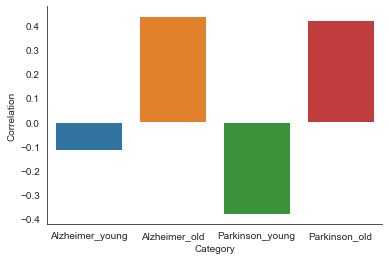

,Combination,p-value
0,Alzheimer_young vs Alzheimer_old,0.0857
1,Alzheimer_young vs Parkinson_young,0.4446
2,Alzheimer_young vs Parkinson_old,0.6143
3,Alzheimer_old vs Parkinson_young,0.0018
4,Alzheimer_old vs Parkinson_old,0.9987
5,Parkinson_young vs Parkinson_old,0.3364


In [13]:
delta_r = ANCOVACorrelation(df=data_df, dependent_variable=dependent_variable, independent_variable=independent_variable, categorical_variable=categorical_variable, out_dir=out_dir, spearman=spearman)
single_data, delta_data = delta_r.run()
delta_data

Visualize Scatter

Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/age_effect_figure/raws/kde_scatters/delta_correlation_plot.svg


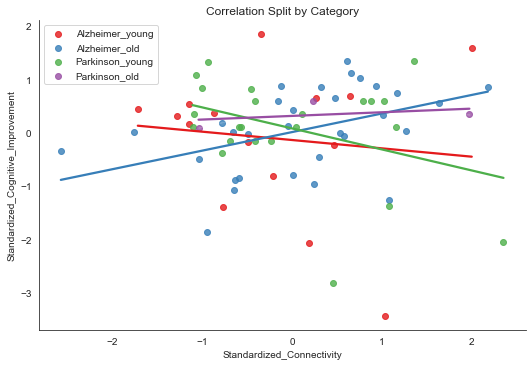

In [14]:
delta_r.plot_correlations_with_lmplot(palette='Set1')

In [15]:
single_data

,Category,Correlation
0,Alzheimer_young,-0.114536
1,Alzheimer_old,0.438207
2,Parkinson_young,-0.379362
3,Parkinson_old,0.421688


# 05 - Delta Scatterplot (Pretty)

In [59]:
# Redefining the class and its methods
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import seaborn as sns
class ScatterWithConfidence:
    def __init__(self, data_df):
        self.data_df = data_df

    @staticmethod
    def compute_analytic_confidence_interval(x, y, x_vals):
        slope, intercept = np.polyfit(x, y, 1)
        y_fit = slope * x_vals + intercept
        
        residuals = y - (slope * x + intercept)
        stderr = np.sqrt(np.sum(residuals**2) / (len(y) - 2))
        
        t_value = t.ppf(0.975, df=len(x)-2)
        ci = t_value * stderr * np.sqrt(1/len(x) + (x_vals - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
        
        upper_bound = y_fit + ci
        lower_bound = y_fit - ci
        
        return y_fit, lower_bound, upper_bound

    def permute_data_and_difference_in_pearson_r(self, x_one, x_two, split_by, split_value, n_permutations=1000, permute_columns=[]):
        original_diff = self.data_df[self.data_df[split_by] < split_value][x_one].corr(self.data_df[self.data_df[split_by] < split_value][x_two]) - \
                       self.data_df[self.data_df[split_by] >= split_value][x_one].corr(self.data_df[self.data_df[split_by] >= split_value][x_two])

        permuted_diffs = []

        for _ in range(n_permutations):
            permuted_df = self.data_df.copy()
            for column in permute_columns:
                permuted_df[column] = np.random.permutation(permuted_df[column].values)
            
            diff = permuted_df[permuted_df[split_by] < split_value][x_one].corr(permuted_df[permuted_df[split_by] < split_value][x_two]) - \
                   permuted_df[permuted_df[split_by] >= split_value][x_one].corr(permuted_df[permuted_df[split_by] >= split_value][x_two])
            
            permuted_diffs.append(diff)

        p_value = np.mean([diff <= original_diff for diff in permuted_diffs])
        return original_diff, p_value

    def plot_with_analytic_ci_manual_pvalue(self, x_one, x_two, 
                                            split_by, split_value, 
                                            x_label='X1', y_label='X2', 
                                            upper_split_legend='Above Split', lower_split_legend='Below Split',
                                            alpha=0.3, manual_p_value=None, permute_column=None, 
                                            save=False, out_dir=None,
                                            colour1='red', colour2='blue'):
        fig, ax = plt.subplots(figsize=(6, 5))
        
        group1 = self.data_df[self.data_df[split_by] < split_value]
        group2 = self.data_df[self.data_df[split_by] >= split_value]

        ax.scatter(group1[x_one], group1[x_two], color=colour1, label=lower_split_legend, s=40, alpha=alpha, marker='o')
        ax.scatter(group2[x_one], group2[x_two], color=colour2, label=upper_split_legend, s=40, alpha=alpha, marker='o')
        
        x_vals = np.linspace(self.data_df[x_one].min(), self.data_df[x_one].max(), 400)
        
        for group, color in [(group1, colour1), (group2, colour2)]:
            y_fit, lower_bound, upper_bound = self.compute_analytic_confidence_interval(group[x_one], group[x_two], x_vals)
            ax.plot(x_vals, y_fit, color=color)
            # ax.fill_between(x_vals, lower_bound, upper_bound, color=color, alpha=alpha/4)
        
        if manual_p_value is None:
            if permute_column:
                rho, manual_p_value = self.permute_data_and_difference_in_pearson_r(x_one, x_two, split_by, split_value, n_permutations=10000, permute_columns=[permute_column])
            else:
                rho, manual_p_value = self.permute_data_and_difference_in_pearson_r(x_one, x_two, split_by, split_value, n_permutations=10000, permute_columns=[x_one, x_two, split_by])
        
        ax.set_title(f"\u0394 r = {rho:.2f} , p = {manual_p_value:.4f}")
        ax.set_ylabel(y_label)
        ax.set_xlabel(x_label)
        ax.legend(loc='best', frameon=False)
        ax.grid(False)
        sns.despine(ax=ax)
        
        if save and out_dir is not None:
            plt.savefig(f"{out_dir}/scatter_with_polyfit_and_analytic_ci.png", bbox_inches='tight')
            plt.savefig(f"{out_dir}/scatter_with_polyfit_and_analytic_ci.svg", bbox_inches='tight')
            print(f'Saved to {out_dir}/scatter_with_polyfit_and_analytic_ci.svg')
        return fig
    
class DeltaCorrelation(ScatterWithConfidence):
    def __init__(self, data_df):
        super().__init__(data_df)

    def plot_histogram_of_delta_r(self, x_one, x_two, split_by, split_value, n_permutations=1000, 
                                permute_columns=[], bins=50, one_tail=False, color_palette='dark'):
        # Generate the empirical distribution of delta_r
        delta_rs = []
        for _ in range(n_permutations):
            permuted_df = self.data_df.copy()
            for column in permute_columns:
                permuted_df[column] = np.random.permutation(permuted_df[column].values)

            delta_r = permuted_df[permuted_df[split_by] < split_value][x_one].corr(permuted_df[permuted_df[split_by] < split_value][x_two]) - \
                    permuted_df[permuted_df[split_by] >= split_value][x_one].corr(permuted_df[permuted_df[split_by] >= split_value][x_two])
            delta_rs.append(delta_r)

        # Calculate the observed delta_r
        observed_delta_r, _ = self.permute_data_and_difference_in_pearson_r(x_one, x_two, split_by, split_value, permute_columns=permute_columns)

        if one_tail:
            observed_delta_r = np.abs(observed_delta_r)
            delta_rs = np.abs(delta_rs)

        # Calculate p-value
        if one_tail:
            p_value = np.mean([delta_r >= observed_delta_r for delta_r in delta_rs])
        else:
            p_value = np.mean([delta_r <= observed_delta_r for delta_r in delta_rs])

        # Generate the displot (KDE + Histogram) using Seaborn
        sns.set_palette(color_palette)
        current_palette = sns.color_palette(color_palette)
        chosen_color = current_palette[4]
        plt.figure(figsize=(6, 5))
        g = sns.displot(delta_rs, kde=True, bins=bins, label="Empirical $\\Delta r$ Distribution", element="step",color='blue', alpha=.6)
        plt.axvline(x=observed_delta_r, color='red', linestyle='-', linewidth=1.5, label=f"Observed $\\Delta r$", alpha=0.6)
        plt.title(f"$\\Delta r$ = {observed_delta_r}, p = {p_value}")
        plt.xlabel("$\\Delta r$")
        plt.ylabel("Count")
        plt.legend()
        
        fig = g.fig
        
        fig.savefig(f"{out_dir}/hist_kde.png", bbox_inches='tight')
        fig.savefig(f"{out_dir}/hist_kde.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/hist_kde.svg')
    


In [60]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline',
       'Z_Scored_Cognitive_Baseline__Lower_is_Better_',
       'Min_Max

Data To Plot

In [61]:
# Data Variables
dependent_variable = 'Z_Scored_Percent_Cognitive_Improvement'
independent_variable = 'Z_Scored_Subiculum_Connectivity'
split_by_var = 'Cohort' # This is the column which contains the values you are going to split the data by 
split_value_var = 1.5 # This is the value which will be used to determine how rows of the given column split the entire dataset

Labels for Plot

In [62]:
# Plotting Variables
x_label = 'Standardized Subiculum Connectivity'
y_label = 'Standardized Percent Improvement'
legend_string_for_lower_split='Alzheimer Disease'
legend_string_for_upper_split='Parkinson Disease'

Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/paradox_resolution_figure/raws/scatter_with_polyfit_and_analytic_ci.svg


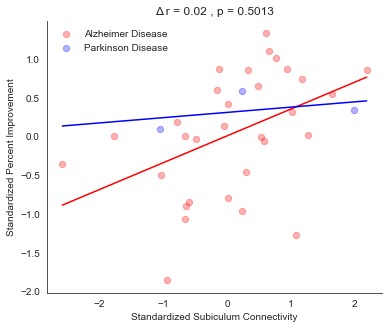

In [63]:
delta_sctr = ScatterWithConfidence(data_df)
delta_sctr_plot = delta_sctr.plot_with_analytic_ci_manual_pvalue(
                                            x_one=independent_variable, x_two=dependent_variable,
                                            split_by=split_by_var, split_value=split_value_var,
                                            x_label=x_label, y_label=y_label,
                                            upper_split_legend=legend_string_for_upper_split, lower_split_legend=legend_string_for_lower_split,
                                            alpha=0.3, manual_p_value=None, permute_column=None,
                                            save=True, out_dir=out_dir,
                                            colour1='#FF0000', colour2='#0000FF')

In [ ]:
# Create an object from the new Seaborn-based class
histogram_plotter_seaborn = DeltaCorrelation(data_df)

# Generate the histogram using Seaborn
fig = histogram_plotter_seaborn.plot_histogram_of_delta_r(x_one=independent_variable, x_two=dependent_variable, 
                                                    split_by=split_by_var, split_value=split_value_var, 
                                                    n_permutations=10000, 
                                                    permute_columns=[independent_variable, dependent_variable, split_by_var], 
                                                    bins=50,
                                                    one_tail=True, 
                                                    color_palette='coolwarm')